<a href="https://colab.research.google.com/github/karsarobert/Machine_learning_2024/blob/main/04/PTE_ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 4. Gyakorlat: Scikit learn, polinomiális regresszió, regularizáció, neuronok mint lineáris egységek
### 2024. február 27.

#Legkisebb négyzetek módszere

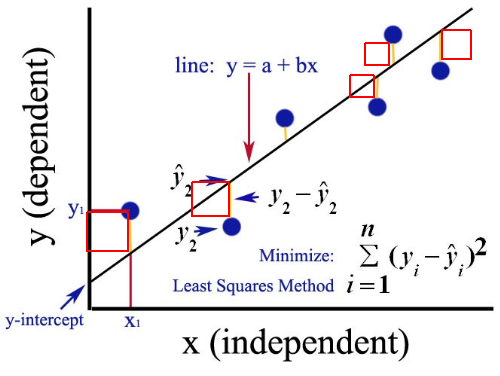

Feladat a négyzetek területének minimalizálása (MSE mint hibafüggvény)

#Polinomiális regresszió (egyváltozós eset)

A polinomiális regresszió egy regressziós algoritmus, amely n-edik fokú polinomként modellezi a függő(y) és független változó(x) közötti kapcsolatot. A polinomiális regressziós egyenlet az alábbiakban látható:
$$
y = b_0 + b_1 x + b_2 x^2 + b_3x^3 + \cdots
$$


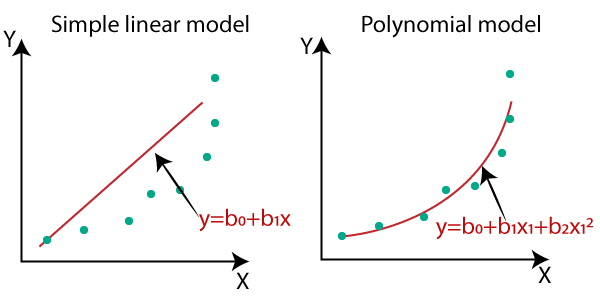

In [ ]:
import pandas as pd

# Load data using read_csv()
df_Salaries = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/Position_Salaries.csv")
df_Salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


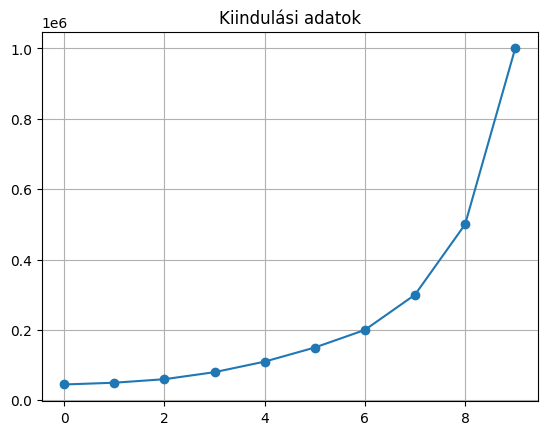

In [ ]:
df_Salaries['Salary'].plot(title='Kiindulási adatok', marker='o', grid=True);


In [ ]:
from sklearn.linear_model import LinearRegression

Salaries_reg = LinearRegression()
X1 = df_Salaries[['Level']] #független változók megadása
y1 = df_Salaries[['Salary']] # függő változók megadása
Salaries_reg.fit(X1, y1) # modell illesztése
df_Salaries['Salaries_pred'] = Salaries_reg.predict(df_Salaries[['Level']]) #predikció készítése

128454.54545454546

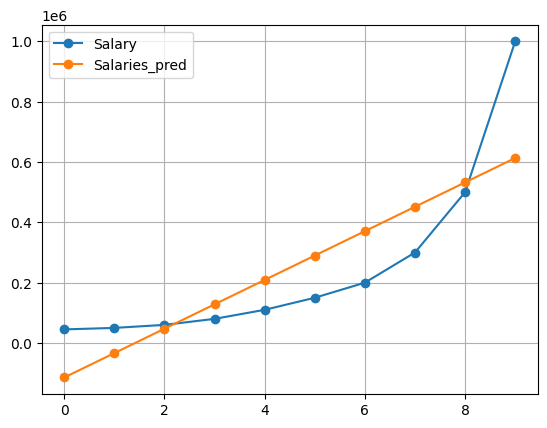

In [ ]:
from sklearn.metrics import mean_absolute_error

df_Salaries[['Salary','Salaries_pred']].plot(marker='o', grid=True)
mean_absolute_error(y1,df_Salaries['Salaries_pred']) #

A PolynomialFeatures transzformátor a bemeneti jellemzők összes lehetséges polinomális kombinációját generálja egy megadott fokszám alapján. Például ha a bemeneti adataink két dimenziósak (x1, x2), és a fokszámot 2-re állítjuk be, akkor a transzformátor a következő jegyeket generálja:

* 1 (bias)
* x1
* x2
* x1^2
* x1 * x2
* x2^2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X1_poly = poly.fit_transform(X1) # átalakítjuk az X értékeket, új oszlopokkal bővytjük X^2,...


In [ ]:
X1_poly[:4] # vizsgáljuk meg hogyan alakította át a bemeneti X adatokat a PolynomialFeatures(degree=3)
# 0. hatvány, első, második, ...

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [ ]:
Salaries_reg.fit(X1_poly, y1)
df_Salaries['Salaries_pred_poly'] = Salaries_reg.predict(X1_poly)

34790.20979020961

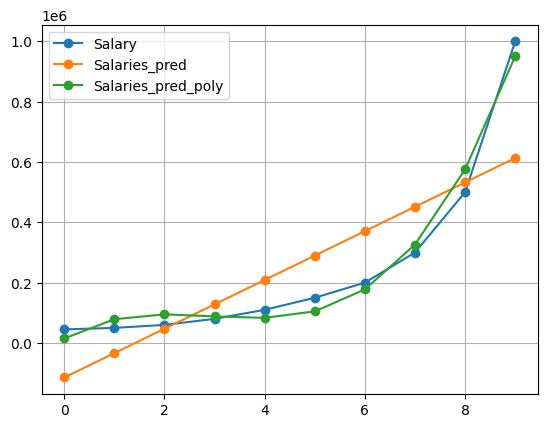

In [ ]:
df_Salaries[['Salary','Salaries_pred', 'Salaries_pred_poly' ]].plot(marker='o', grid=True)
mean_absolute_error(y1,df_Salaries['Salaries_pred_poly']) # abszolút hiba most jóval kisebb

In [ ]:
type(Salaries_reg.coef_[0,1])

Salaries_reg.intercept_

array([-121333.3333333])

In [ ]:
print(
    'Előre jelzett bér = {:.1f} + {:.1f} * évek száma + {:.1f} * évek számaa négyzeten + {:.1f} * évek száma a köbön'.format(
        Salaries_reg.intercept_[0], Salaries_reg.coef_[0,1], Salaries_reg.coef_[0,2], Salaries_reg.coef_[0,3]
    )
)

Előre jelzett bér = -121333.3 + 180664.3 * évek száma + -48549.0 * évek számaa négyzeten + 4120.0 * évek száma a köbön


#Túlillesztés, alulillesztés
állítsuk a polinomfokot 1-re, 2, re 12-re
figyeljük meg hogyan változik X_poly mérete

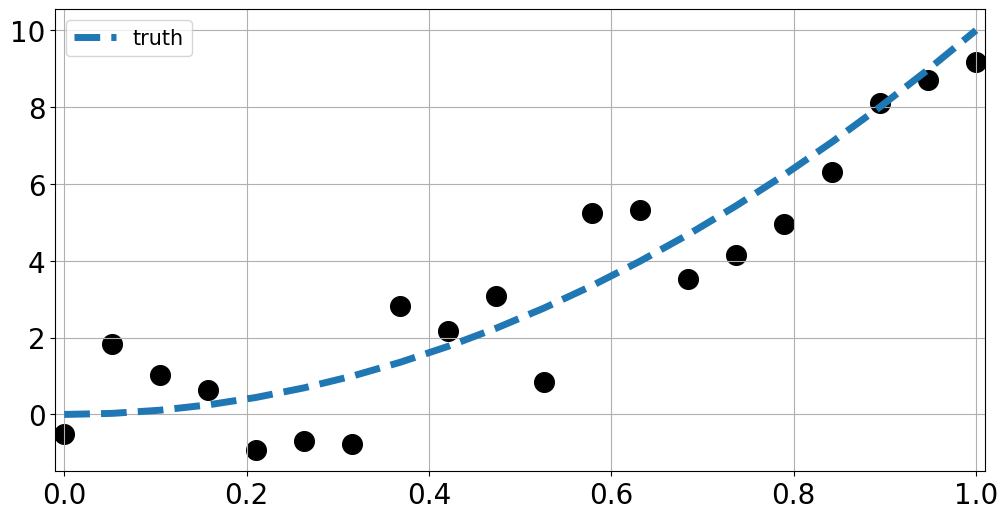

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#X jelölje az időt, y pedig szabadesésben egy tárgy által megtett utat!

plt.figure(figsize=(12, 6))
np.random.seed(42)
X2 = np.linspace(0, 1, 20) # vegyünk fel 20 db X értékeket 0 és 1 között
y2= 10*X2**2 #számítsuk ki a négyzetét
#y_measured =  y + np.random.random(20)*7
y_measured =  y2 + np.random.uniform(-1,1,20)*2 # Készítsünk szintetikus adatokat, amelyek az y-ból és némi zajból állnak fekete pontok
plt.plot(X2, y2, lw=5, label = 'truth', ls='--') # ábrázoljuk a kék szaggatott vonalat amely az adatok valódi értékeit jelentik, de ezeket az adtokat nem ismerjük
plt.scatter(X2, y_measured, s=200, c = 'k') # ábrázoljuk a szintetikus adatokat amit ismerünk pl. egy mérésből ezeket kaptuk!

# amikor regressziós modellt építünk csak az X és y_measured adatokat ismerjük!
#szeretnénk olyan modellt építeni amely egy adott X értékhez (korábban nem látott) olyan y értéket ad meg amely a lehető legközelebb van a kék szaggatott vonalhoz

plt.xlim(-.01, 1.01)
#plt.axis('off')
plt.legend(fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
#plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

reg = LinearRegression()
X2 = X2.reshape(-1, 1)
y_measured = y_measured.reshape(-1, 1)
poly = PolynomialFeatures(degree=6) #állítsuk a polinomfokot 1-re, 2, re 12-re figyeljük meg hogyan változik X_poly mérete
X_poly = poly.fit_transform(X2) # átalakítjuk az X értékeket, új oszlopokkal bővytjük X^2,x^3,...
reg.fit(X_poly,y_measured) # számítsuk ki az előrejelzett értékeket ezek a magas polinom szám esetén már nagyon pontosan illeszkednek

X_t = np.linspace(0,1,50).reshape(-1,1) # vegyünk fel most új X értékeket ezek nagyrészét a modell még nem látta hiszen finomabb beosztás 50 érték a korábbi 20 helyett
X_t_poly = poly.fit_transform(X_t) # az új értékekhez is végezzük el a polinomiális átalakítást, hiszen a modellnek több bemenet (oszlop) kell már!!!

y_pred = reg.predict(X_t_poly) # végezzük el az előrejelzést az új adatainkra is!!!


In [ ]:

X_poly_df = pd.DataFrame(X_poly) #alakítsuk át dataframe formába és vizsgáljuk meg!
X_poly_df

,0,1,2,3,4,5,6
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,1.0,0.052632,0.002770,0.000146,0.000008,4.038611e-07,2.125585e-08
2,1.0,0.105263,0.011080,0.001166,0.000123,1.292355e-05,1.360374e-06
3,1.0,0.157895,0.024931,0.003936,0.000622,9.813824e-05,1.549551e-05
4,1.0,0.210526,0.044321,0.009331,0.001964,4.135537e-04,8.706395e-05
5,1.0,0.263158,0.069252,0.018224,0.004796,1.262066e-03,3.321226e-04
6,1.0,0.315789,0.099723,0.031491,0.009945,3.140424e-03,9.917127e-04
7,1.0,0.368421,0.135734,0.050007,0.018424,6.787693e-03,2.500729e-03
8,1.0,0.421053,0.177285,0.074646,0.031430,1.323372e-02,5.572092e-03
9,1.0,0.473684,0.224377,0.106284,0.050345,2.384759e-02,1.129623e-02


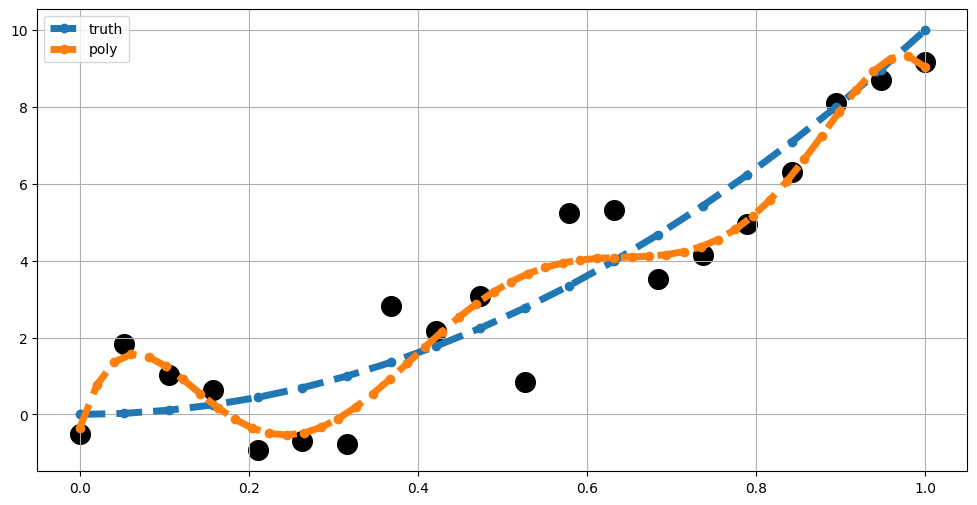

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X2, y2, lw=5, label = 'truth', ls='--', marker='o')
plt.plot(X_t, y_pred, lw=5, label = 'poly', ls='--', marker='o')
plt.scatter(X2, y_measured, s=200, c = 'k')
plt.grid()
plt.legend()
#plt.show()

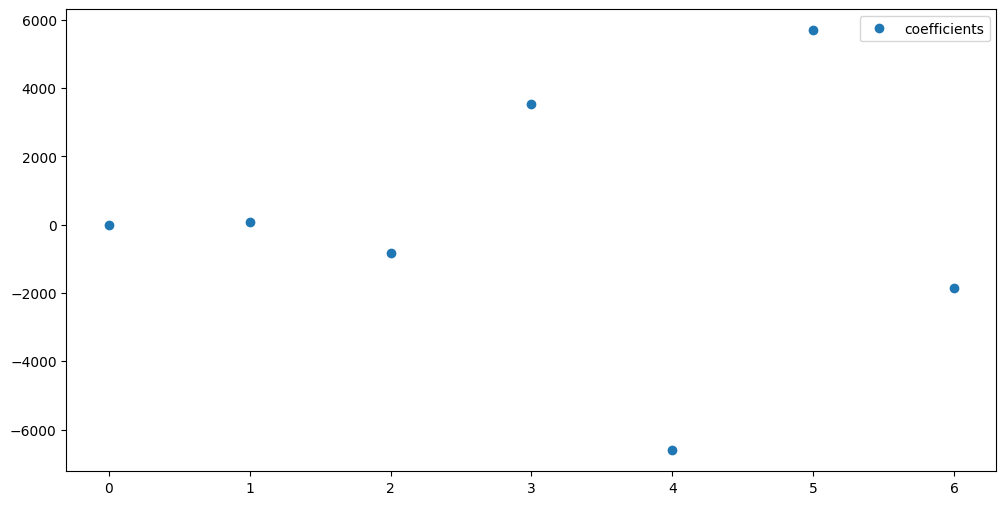

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(reg.coef_.reshape(-1,1), 'o', label='coefficients')
plt.legend()
# azt láthatjuk, hogy az együtthatók nagyon nagyok és váltakozó előjelűek ugrálnak!


In [ ]:
reg.coef_

array([[    0.        ,    71.10365895,  -839.74732604,  3535.39700939,
        -6608.05555024,  5695.34314223, -1844.63864401]])

### Ridge regresszió ($L_2$ Regularizáció)

A regularizáció talán legelterjedtebb formája a *Ridge regresszió* vagy $L_2$ *regularizáció*, néha *Tihonov regularizáció* néven is ismert.
Ez a modellkoefficiensek négyzetösszegének (2-normáinak) büntetésével történik; ebben az esetben a modellillesztés büntetése a következő lenne
$$
P = \alpha\sum_{n=1}^N \beta_n^2
$$
ahol $\alpha$ egy szabad paraméter, amely a büntetés erősségét szabályozza, $\beta_n$ pedig az együtthatókat jelöli


### Lasso regresszió ($L_1$ regularizáció)

A regularizáció egy másik, nagyon gyakori típusa a lasso, amely a regressziós együtthatók abszolút értékeinek (1-normák) összegének büntetését jelenti:
$$
P = \alpha\sum_{n=1}^N |\beta_n|
$$
Bár ez koncepcionálisan nagyon hasonló a ridge-regresszióhoz, az eredmények meglepően eltérőek lehetnek: például geometriai okokból a lasso regresszió hajlamos arra, hogy ahol lehetséges, a *ritkás modelleket* részesítse előnyben: azaz a modell együtthatóit lehetőleg pontosan nullára állítsa.



A költség függvény kiegészül egy új taggal: P
$$\sum_{i=1}^n(y_i-\hat{y}_i)^2 + P$$

$$\sum_{i=1}^n(y_i-\beta_0 x - b)^2 + P$$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

reg_lasso = Lasso(alpha=0.001)
reg_ridge = Ridge(alpha=0.1)
reg_lasso.fit(X_poly,y_measured)
reg_ridge.fit(X_poly,y_measured)
y_test_pred = reg.predict(X_t_poly)
y_pred_lasso = reg_lasso.predict(X_t_poly)
y_pred_ridge = reg_ridge.predict(X_t_poly)

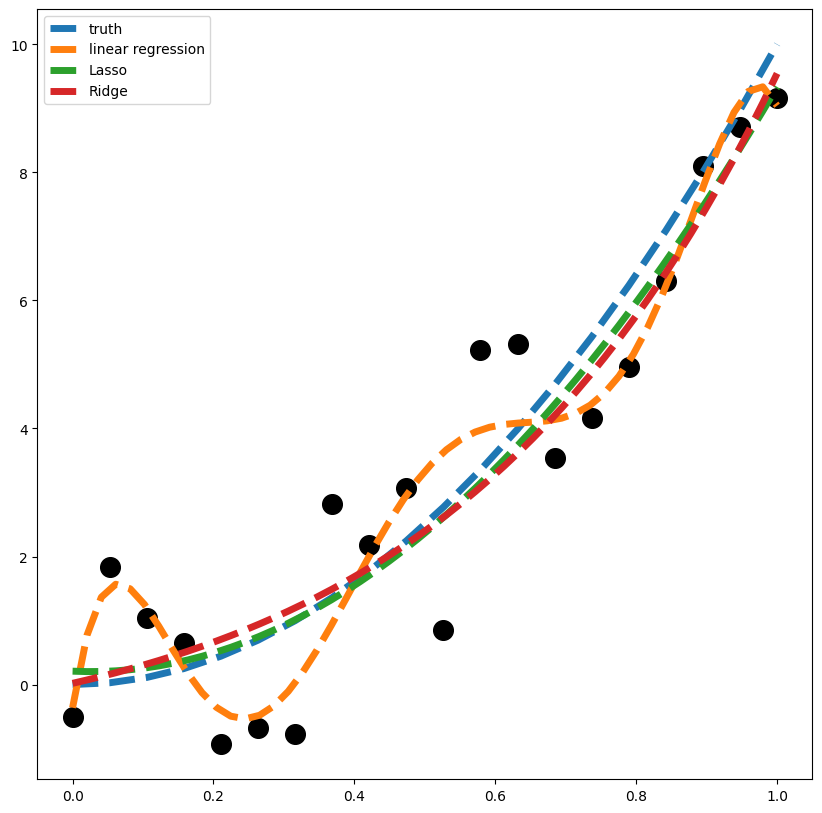

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X2, y_measured, s=200, c = 'k')
plt.plot(X2, y2, lw=5, label = 'truth', ls='--')
plt.plot(X_t, y_pred, lw=5, label = 'linear regression', ls='--')
plt.plot(X_t, y_pred_lasso, lw=5, label = 'Lasso', ls='--')
plt.plot(X_t, y_pred_ridge, lw=5, label = 'Ridge', ls='--')
plt.legend()
#plt.show()

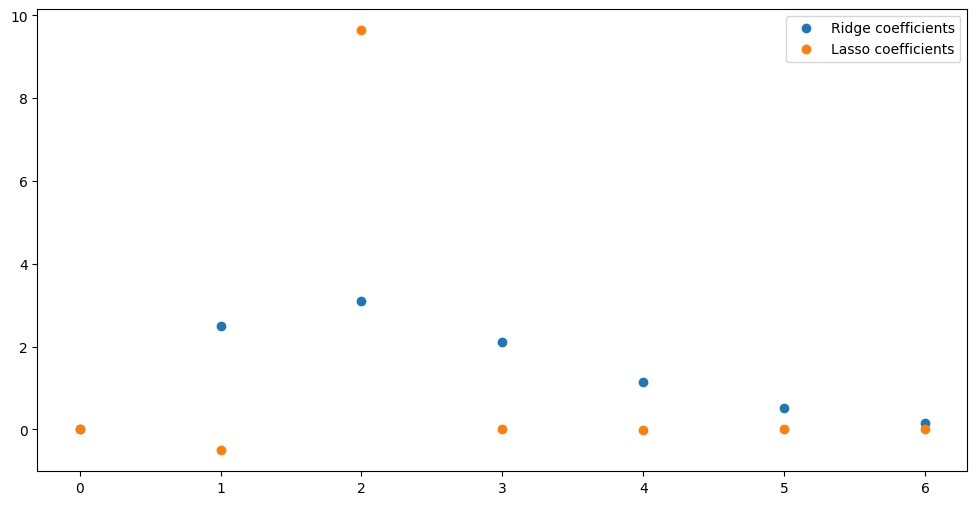

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(reg_ridge.coef_.reshape(-1,1), 'o', label='Ridge coefficients')
plt.plot(reg_lasso.coef_, 'o', label='Lasso coefficients')
plt.legend()
#plt.show()

#Vissza a Bostoni lakásárakhoz
figyeljük meg X_train_poly alakját!!!

In [ ]:
import pandas as pd

# Load data using read_csv()
Boston_dataset = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/Boston.csv")



In [ ]:
X = Boston_dataset[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']]
y = Boston_dataset.medv



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [ ]:
from sklearn.linear_model import LinearRegression

Boston_regressor = LinearRegression()
Boston_regressor.fit(X_train, y_train)

y_prediction = Boston_regressor.predict(X_test)

In [ ]:
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(X_train, y_train)

y_baselin = baselin.predict(X_test)
#y_baselin

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_prediction),
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_prediction),
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_prediction),
        mean_squared_error(y_test, y_baselin)
    )
)

R2 Regressor = 0.54 vs Baseline = -0.00
MAE Regressor = 3.72 vs Baseline = 5.96
MSE Regressor = 30.11 vs Baseline = 66.28


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train) # átalakítjuk az X értékeket, új oszlopokkal bővytjük X^2,...
X_test_poly = poly.transform(X_test)



In [ ]:
print(X_train.shape)
print(X_train_poly.shape)


(303, 13)
(303, 105)


A másodfokú és a köbös jellemzőtranszformáció eléréséhez a degree paramétert 3-ra állítjuk.

Az egyik bosszantó dolog PolynomialFeatures, hogy nem követi nyomon a DataFrame oszlopneveit. A jellemzők neveit x0, x1, x2 és így tovább cseréli. Python-készségeink birtokában azonban visszaszerezhetjük oszlopneveinket. Tegyük pontosan ezt a következő kódblokk segítségével:

In [ ]:
poly.n_output_features_

105

In [ ]:
X_train_poly = pd.DataFrame(X_train_poly)
X_test_poly = pd.DataFrame(X_test_poly)
X_train_poly.columns[:20]

RangeIndex(start=0, stop=20, step=1)

In [ ]:
X_train_poly[:5]

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,101,102,103,104
0,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,...,147456.0,8025.6,151772.16,4711.68,436.81,8260.516,256.443,156214.6576,4849.5948,150.5529
1,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,...,77841.0,5356.8,110735.10,2446.83,368.64,7620.480,168.384,157529.6100,3480.8130,76.9129
2,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,...,162409.0,5924.1,146462.29,1849.77,216.09,5342.421,67.473,132081.3649,1668.1437,21.0681
3,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,...,94249.0,6447.0,120506.71,4245.81,441.00,8243.130,290.430,154079.8009,5428.6899,191.2689
4,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,...,186624.0,7689.6,146288.16,6639.84,316.84,6027.614,273.586,114670.2769,5204.7431,236.2369


In [ ]:
X_train_poly.drop(0,
  axis='columns', inplace=True)

X_test_poly.drop(0,
  axis='columns', inplace=True)



Boston_regressor.fit(X_train_poly, y_train)
y_test_pred = Boston_regressor.predict(X_test_poly)
y_train_pred = Boston_regressor.predict(X_train_poly) # kiszámoljuk a tréningadatokra is az előrejelzéseket!!!

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor on training data = {:.2f} !!!!!! túlillesztés'.format(
        r2_score(y_train, y_train_pred),

    )
)

R2 Regressor = -96.23 vs Baseline = -0.01
MAE Regressor = 14.76 vs Baseline = 6.29
MSE Regressor = 7037.74 vs Baseline = 72.75
MSE Regressor on training data = 0.05 !!!!!! túlillesztés


#OCCAM elv:
"It is vain to do with more what can be done with fewer."
"Hiábavaló többel megtenni azt, amit kevesebbel is meg lehet tenni."

In [ ]:
from sklearn.linear_model import Ridge, Lasso

reg = Lasso()
reg.fit(X_train_poly, y_train)

y_test_pred = reg.predict(X_test_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.778e+03, tolerance: 2.796e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_baselin)
    )
)

R2 Regressor = 0.71 vs Baseline = -0.01
MAE Regressor = 2.95 vs Baseline = 6.29
MSE Regressor = 20.65 vs Baseline = 72.75


#Több funkció kombinálása statisztikai műveletekkel
Új funkciók hozhatók létre matematikai és statisztikai műveletek végrehajtásával a meglévő változókon.
Például a teljes adósságot úgy tudjuk kiszámítani, hogy összegezzük az adósságot az egyes pénzügyi termékek között:

Összes adósság = autóhitel-tartozás + hitelkártya-tartozás + jelzálog-tartozás

Alternatív statisztikai műveletek segítségével más betekintést nyújtó funkciókat is levezethetünk. Például meghatározhatjuk egy ügyfél maximális adósságát a pénzügyi termékek között, azt a minimális időt, amelyet weboldalunk egy oldalán való böngészéssel töltött, vagy azt az átlagos időt, amelyet magazinunk cikkének olvasásával töltött:

maximális adósság = max(autóhitel egyenlege, hitelkártya egyenlege, jelzálog egyenlege)

Minimális idő az oldalon = min(idő a kezdőlapon, idő a körülbelül oldalon, idő a kapcsolatfelvételi oldalon)

Cikk olvasásának átlagos ideje = (az 1. cikkhez szükséges idő + a 2. cikkhez szükséges idő + a 3. cikk idője) / Darabszám (cikkek)

Elvileg bármilyen matematikai vagy statisztikai műveletet felhasználhatunk új funkciók létrehozására, mint például a szorzat, az átlag, a szórás, illetve a maximális vagy minimális értékek, hogy csak néhányat említsünk. Ebben a receptben ezeket a matematikai műveleteket pandas segítségével hajtjuk végre.

In [ ]:
import pandas as pd

# Load data using read_csv
Boston_dataset = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/Boston.csv")



In [ ]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']
X = Boston_dataset[features]
y = Boston_dataset.medv
X


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
X[features].prod(axis=1) #Ez a metódus kiszámítja a kiválasztott oszlopok elemeinek szorzatát soronként. Az axis=1 paraméter azt jelzi, hogy a szorzatot oszlop-irányban kell kiszámítani.


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

In [ ]:
X['prod_features'] = X[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']].prod(axis=1)

<ipython-input-103-9ceee0860cdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['prod_features'] = X[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis','rad', 'tax', 'ptratio', 'black', 'lstat']].prod(axis=1)


In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prod_features
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,2.218932e+09
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0.000000e+00
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0.000000e+00
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0.000000e+00
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,0.000000e+00
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,0.000000e+00
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,0.000000e+00
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,0.000000e+00


In [ ]:
X['mean_features'] = X.mean(axis=1)

In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prod_features,mean_features
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,2.218932e+09,1.584952e+08
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0.000000e+00,5.469246e+01
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0.000000e+00,5.281988e+01
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0.000000e+00,5.020004e+01
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0.000000e+00,5.114616e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,0.000000e+00,5.624266e+01
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,0.000000e+00,5.704541e+01
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,0.000000e+00,5.787480e+01
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,0.000000e+00,5.757325e+01


In [ ]:
X = Boston_dataset[features]

In [ ]:
X[['sum', 'prod','mean','std', 'max', 'min']] = X[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')

<ipython-input-108-94f9f23b9131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['sum', 'prod','mean','std', 'max', 'min']] = X[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')


In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,sum,prod,mean,std,max,min
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,810.89932,0.0,62.376871,128.926582,396.90,0.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,765.69441,0.0,58.899570,121.703271,396.90,0.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,739.47839,0.0,56.882953,120.765781,392.83,0.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,702.80057,0.0,54.061582,118.875981,394.63,0.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,716.04625,0.0,55.080481,119.300382,396.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,787.39723,0.0,60.569018,124.497614,391.99,0.0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,798.63577,0.0,61.433521,125.694166,396.90,0.0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,810.24726,0.0,62.326712,125.999137,396.90,0.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,806.02549,0.0,62.001961,125.169802,393.45,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [ ]:
from sklearn.linear_model import LinearRegression

Boston_regressor = LinearRegression()
Boston_regressor.fit(X_train, y_train)

y_prediction = Boston_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_prediction),
        r2_score(y_test, y_baselin)
     )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_prediction),
        mean_absolute_error(y_test, y_baselin)
    )
)
print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_prediction),
        mean_squared_error(y_test, y_baselin)
    )
)

R2 Regressor = 0.74 vs Baseline = -0.01
MAE Regressor = 3.43 vs Baseline = 7.12
MSE Regressor = 24.06 vs Baseline = 92.41
